In [40]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy
from numpy import cov

download_url = "https://raw.githubusercontent.com/fivethirtyeight/data/master/nba-elo/nbaallelo.csv"
target_csv_path = "nba_all_elo.csv"

response = requests.get(download_url)
response.raise_for_status()    # Check that the request was successful
with open(target_csv_path, "wb") as f:
    f.write(response.content)

nba = pd.read_csv("nba_all_elo.csv")

In [61]:
type(nba)

pandas.core.frame.DataFrame

In [60]:
nba.head()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,66,1300.0000,1293.2767,40.294830,NYK,Knicks,68,1300.0000,1306.7233,H,L,0.640065,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,68,1300.0000,1306.7233,41.705170,TRH,Huskies,66,1300.0000,1293.2767,A,W,0.359935,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,63,1300.0000,1309.6521,42.012257,NYK,Knicks,47,1306.7233,1297.0712,H,W,0.631101,NaN
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,47,1306.7233,1297.0712,40.692783,CHS,Stags,63,1300.0000,1309.6521,A,L,0.368899,NaN
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,33,1300.0000,1279.6189,38.864048,WSC,Capitols,50,1300.0000,1320.3811,H,L,0.640065,NaN


In [59]:
#We are looking to see if there is any correlation in the amount of games played to less points scored per game every season.

count    126314.000000
mean        102.729982
std          14.814845
min           0.000000
25%          93.000000
50%         103.000000
75%         112.000000
max         186.000000
Name: pts, dtype: float64

count    126314.000000
mean         43.533733
std          25.375178
min           1.000000
25%          22.000000
50%          43.000000
75%          65.000000
max         108.000000
Name: seasongame, dtype: float64


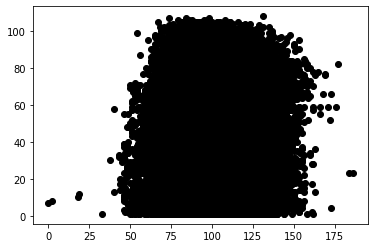

In [62]:
#Scatterplot
print(nba.pts.describe())
print("")
print(nba.seasongame.describe())

x = nba.pts
y = nba.seasongame

plt.plot(x, y, 'o', color='black');

In [65]:
#Now we must test a random sample to make our graph more legible
import random
nbas = nba.sample(n=1000, random_state=10)

#Checking if the random sampling has happened
print(nbas.pts.describe())
print("")
print(nbas.seasongame.describe())

#We are testing if the sampled is any amount statistically different from the population
#Right now the null hypothesis is that these two are statistically similiar. 
#We want the the two to be the same so we're looking for a TTest pvalue >= .05 as evidence to prove our null hypothesis
from scipy import stats as st
print(st.ttest_ind(nba.pts, nbas.pts, equal_var=True))
print(st.ttest_ind(nba.seasongame, nbas.seasongame, equal_var=True))

count    1000.000000
mean      102.624000
std        15.432913
min        53.000000
25%        92.750000
50%       103.000000
75%       113.000000
max       149.000000
Name: pts, dtype: float64

count    1000.000000
mean       43.532000
std        25.573051
min         1.000000
25%        21.000000
50%        43.000000
75%        64.000000
max       102.000000
Name: seasongame, dtype: float64
Ttest_indResult(statistic=0.22525753170026144, pvalue=0.8217792970011716)
Ttest_indResult(statistic=0.0021515394794825527, pvalue=0.9982833245628304)


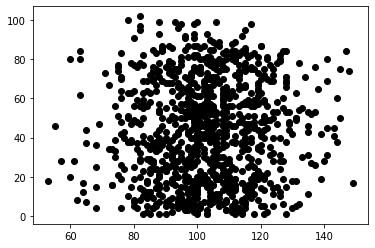

In [56]:
a = nbas.pts
b = nbas.seasongame
plt.plot(a, b, 'o', color='black');

In [55]:
#Pearson Correlation Between two Variables
from scipy.stats import pearsonr
print("Full Sample Correlation", pearsonr(nba.pts, nba.seasongame))
print("Sample Correlation", pearsonr(nbas.pts, nbas.seasongame))

Full Sample Correlation (0.06191588724672478, 1.6141744144038865e-107)
Sample Correlation (0.046927074961592104, 0.13809423630637638)


In [54]:
#Spearman Rank
from scipy.stats import spearmanr
print("Full Sample Correlation", spearmanr(nba.pts, nba.seasongame))
print("Sample Correlation", spearmanr(nbas.pts, nbas.seasongame))

Full Sample Correlation SpearmanrResult(correlation=0.05893975646833312, pvalue=1.351769412378851e-97)
Sample Correlation SpearmanrResult(correlation=0.04699685100375338, pvalue=0.13750865167681164)


In [53]:
#We test for correlation between -1<0<1 so since our Spearman/Pearsons correlations are below 0.1, there is almost no correlation.